# Content and Objectives

- Show transmission signals and spectra of BPSK and OOK
- Random data (and thus random signals) are generated, spectra being estimated by averaging

# Import

In [2]:
# importing
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import shutil

# showing figures inline
%matplotlib inline

In [4]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True if shutil.which('latex') else False)


matplotlib.rc('figure', figsize=(14, 6) )

# Parameters

In [5]:
# symbol time and number of symbols    
t_symb = 1.0
n_symb = 100

# samples per symbol
n_up = 8


# parameters for frequency regime
N_fft = 512
Omega = np.linspace(-np.pi, np.pi, N_fft)
f_vec = Omega / ( 2*np.pi*t_symb/n_up )


# Real data-modulated Tx-signal

In [6]:
# define rectanguler pulse corresponding to sample-and-hold    
rect = np.ones( n_up)


# number of realizations along which to average the psd estimate
n_real = 10


# initialize two-dimensional field for collecting several realizations along which to average 
OOK = np.zeros( (n_real, N_fft ), dtype=complex ) 
BPSK = np.zeros( (n_real, N_fft ), dtype=complex )

# variance of 0.1 for the noise
sigma2 = .1


# loop for realizations
for k in np.arange( n_real ):

    # generate random binary vector and modulate the specified modulation scheme
    data = np.random.randint( 2, size = n_symb )

    # get signals by putting symbols and filtering
    s_up_ook = np.zeros( n_symb * n_up )      
    s_up_ook[ : : n_up ] = np.sqrt(2) * data
    s_ook = np.convolve( rect, s_up_ook) 
    
    s_up_bpsk = np.zeros( n_symb * n_up )      
    s_up_bpsk[ : : n_up ] = (-1)**( data + 1 )
    s_bpsk = np.convolve( rect, s_up_bpsk)

    # get magnitude square in the frequency regima
    OOK[ k, :] = np.fft.fftshift( np.fft.fft( s_ook, N_fft ) )
    BPSK[ k, :] = np.fft.fftshift( np.fft.fft( s_bpsk, N_fft ) )
    
# average along realizations
OOK_PSD_sim = np.average( np.abs( OOK )**2 , axis=0 )
OOK_PSD_sim /= np.max( OOK_PSD_sim )

BPSK_PSD_sim = np.average( np.abs( BPSK )**2, axis=0 )
BPSK_PSD_sim /= np.max( BPSK_PSD_sim )

# Plotting

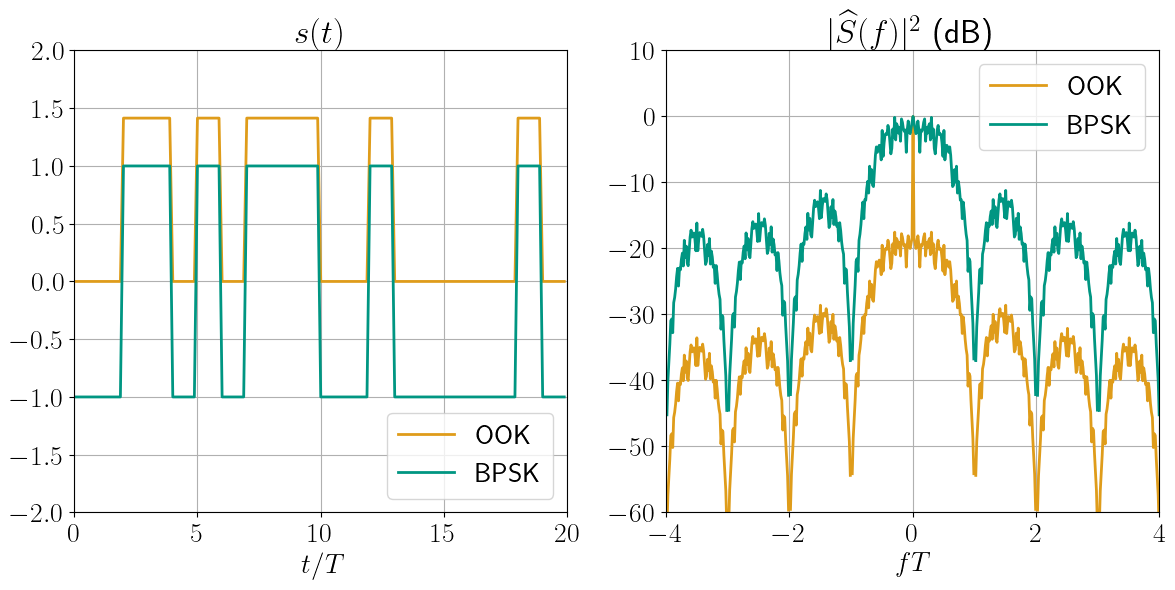

In [7]:
plt.subplot(121)
plt.plot( np.arange( np.size( s_ook[ : 20 * n_up] ) ) * t_symb / n_up, s_ook[ : 20 * n_up ], linewidth=2.0, label='OOK',  c=(0.875, 0.61, 0.1) )    
plt.plot( np.arange( np.size( s_bpsk[ : 20 * n_up] ) ) * t_symb / n_up, s_bpsk[ : 20 * n_up ], linewidth=2.0, label='BPSK', c=(0,0.59,0.51))        
plt.ylim( (-1.1, 1.1 ) )

plt.grid(True)    
plt.legend(loc='lower right')    
plt.xlabel('$t/T$')
plt.title('$s(t)$')
plt.xlim( (0, 20) )
plt.ylim( (-2, 2 ) )


plt.subplot(122)
np.seterr(divide='ignore') # ignore warning for logarithm of 0
plt.plot( f_vec, 10*np.log10( OOK_PSD_sim ), linewidth=2.0, label='OOK', c=(0.875, 0.61, 0.1) )    
plt.plot( f_vec, 10*np.log10( BPSK_PSD_sim ), linewidth=2.0, label='BPSK', c=(0,0.59,0.51) ) 
np.seterr(divide='warn') # enable warning for logarithm of 0

plt.grid(True); 
plt.xlabel('$fT$');  
plt.title(r'$|\widehat{S}(f)|^2$  (dB)')  

plt.legend(loc='upper right')
plt.ylim( (-60, 10 ) ) 
plt.xlim( (-4, 4) )
plt.savefig('bpsk_ook.pdf', bbox_inches='tight')